In [1]:
# For mathematical computation

import numpy as np
import pandas as pd
import scipy.stats as stats

# For data visualization

import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from matplotlib.pyplot import figure

%matplotlib inline

In [2]:
df = pd.read_csv("IPO.csv", encoding="latin-1")
df.head()

,Date,IPO_Name,Issue_Size(crores),QIB,HNI,RII,Issue_price,Listing_Open,Listing_Close,Listing_Gains(%),CMP,Current_gains
0,26-11-21,Tarsons Product,1030.22,1.06,3.40,2.49,662.0,700.0,840.00,26.89,641.45,-3.10
1,23-11-21,Latent View,622.11,145.48,850.66,119.44,197.0,530.0,488.60,148.02,639.85,224.80
2,18-11-21,Sapphire Foods,2073.00,3.11,2.34,5.25,1180.0,1311.0,1216.05,3.06,"1,048.05",-11.18
3,18-11-21,One 97(Paytm),18915.90,2.79,0.24,1.66,2150.0,1955.0,1564.15,-27.25,"1,655.00",-23.02
4,15-11-21,SJS Enterprises,816.57,1.42,2.32,1.38,542.0,514.0,509.85,-5.93,441.05,-18.63


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                288 non-null    object 
 1   IPO_Name            288 non-null    object 
 2   Issue_Size(crores)  288 non-null    float64
 3   QIB                 288 non-null    float64
 4   HNI                 288 non-null    float64
 5   RII                 288 non-null    float64
 6   Issue_price         288 non-null    float64
 7   Listing_Open        288 non-null    float64
 8   Listing_Close       288 non-null    float64
 9   Listing_Gains(%)    288 non-null    float64
 10  CMP                 288 non-null    object 
 11  Current_gains       286 non-null    float64
dtypes: float64(9), object(3)
memory usage: 27.1+ KB


In [4]:
# Describe the data

df.describe()

,Issue_Size(crores),QIB,HNI,RII,Issue_price,Listing_Open,Listing_Close,Listing_Gains(%),Current_gains
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,286.000000
mean,1118.383750,24.834688,71.413646,8.341181,368.913194,438.374653,396.502917,5.993056,65.616573
std,2160.932743,37.837647,142.500596,14.159700,361.287606,458.703932,439.609061,49.354577,261.408128
min,0.000000,0.000000,0.000000,0.000000,0.000000,9.500000,1.570000,-97.150000,-99.930000
25%,156.142500,1.147500,1.210000,1.367500,113.750000,125.200000,104.112500,-11.340000,-73.785000
50%,474.000000,4.810000,5.075000,3.405000,242.500000,272.200000,234.555000,2.315000,-1.800000
75%,1049.480000,35.492500,73.295000,8.535000,522.500000,600.000000,584.975000,25.780000,114.397500
max,18915.900000,176.850000,958.070000,119.440000,2150.000000,2725.000000,3118.650000,270.400000,2478.690000


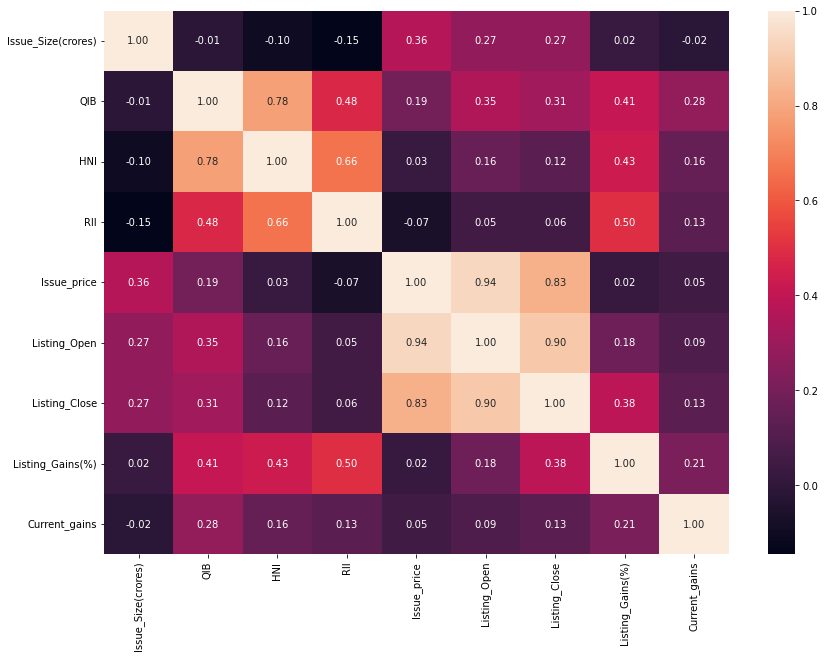

In [5]:
# Heatmap

f, ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax)
plt.show()

In [6]:
# Cleaning & Modification of Data

date = df.Date.str.split('-', expand=True)
df['year'] = date[2]
df['month'] = date[1]
df['day'] = date[0]

df.year = pd.to_numeric(df.year)
df.month = pd.to_numeric(df.month)
df.day = pd.to_numeric(df.day)

In [7]:
df.head()

,Date,IPO_Name,Issue_Size(crores),QIB,HNI,RII,Issue_price,Listing_Open,Listing_Close,Listing_Gains(%),CMP,Current_gains,year,month,day
0,26-11-21,Tarsons Product,1030.22,1.06,3.40,2.49,662.0,700.0,840.00,26.89,641.45,-3.10,21,11,26
1,23-11-21,Latent View,622.11,145.48,850.66,119.44,197.0,530.0,488.60,148.02,639.85,224.80,21,11,23
2,18-11-21,Sapphire Foods,2073.00,3.11,2.34,5.25,1180.0,1311.0,1216.05,3.06,"1,048.05",-11.18,21,11,18
3,18-11-21,One 97(Paytm),18915.90,2.79,0.24,1.66,2150.0,1955.0,1564.15,-27.25,"1,655.00",-23.02,21,11,18
4,15-11-21,SJS Enterprises,816.57,1.42,2.32,1.38,542.0,514.0,509.85,-5.93,441.05,-18.63,21,11,15


In [8]:
# Pie Chart of year-wise IPO launches in India

fig1 = px.pie(df, names="year")
fig1.show()

In [9]:
# Pie Chart of Month Wise IPO Launches in India

fig2 = px.pie(df, names="month")
fig2.show()

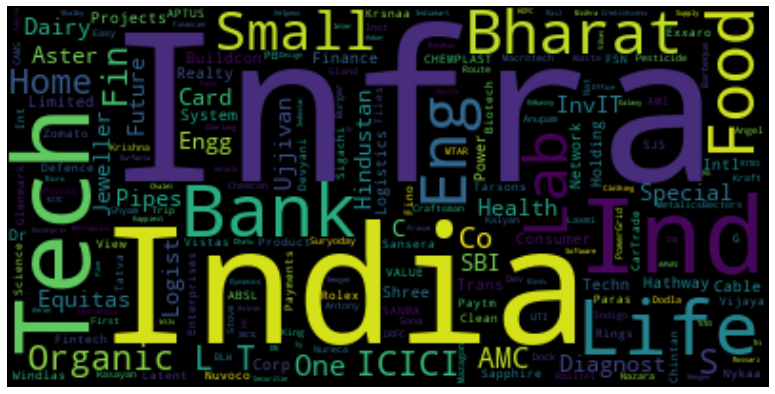

In [12]:
# WordCloud

from wordcloud import WordCloud

wordCloud = WordCloud().generate(' '.join(df.IPO_Name))

plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(wordCloud, interpolation="bilinear")
plt.show()